# Dinosaur Data Analysis

This notebook contains the code responsible for building the timeseries visualizations needed for the analysis section of homework 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

In [2]:
mobile = pd.read_json("data/dino_monthly_mobile_201507-202209.json")
mobile['timestamp'] = mobile['timestamp'].apply(lambda x: x.strftime('%Y-%m'))
desktop = pd.read_json("data/dino_monthly_desktop_201507-202209.json")
desktop['timestamp'] = desktop['timestamp'].apply(lambda x: x.strftime('%Y-%m'))

## Creating the maximum and minimum average timeseries.

First let's get the dinosaurs with the highest and lowest monthly averages for desktop and mobile.

In [3]:
# Get the average views for each dinosaur
mobile_avgs = mobile.groupby(['article']).agg({'views': 'mean'})
mobile_avgs = mobile_avgs.reset_index()
mobile_avgs = mobile_avgs.sort_values(by = 'views', ascending = False)
desk_avgs = desktop.groupby(['article']).agg({'views': 'mean'})
desk_avgs = desk_avgs.reset_index()
desk_avgs = desk_avgs.sort_values(by = 'views', ascending = False)
# Get the highest and lowest average dinosaur pages
mobile_avg_max = mobile_avgs['article'].head(1)
mobile_avg_min = mobile_avgs['article'].tail(1)
desk_avg_max = desk_avgs['article'].head(1)
desk_avg_min = desk_avgs['article'].tail(1)

Now the visualizations can be built for the largest and smallest mobile and desktop articles. First we will restrict the data to only the articles we want.

In [4]:
# Get the timeseries data filtered
max_mobile = mobile[mobile['article'].isin(mobile_avg_max)]
min_mobile = mobile[mobile['article'].isin(mobile_avg_min)]
max_desk = desktop[desktop['article'].isin(desk_avg_max)]
min_desk = desktop[desktop['article'].isin(desk_avg_min)]
# Aggregate the views for the time series
max_mobile = max_mobile[['timestamp', 'views']]
max_mobile.rename(columns={'views': 'max_mobile'}, inplace=True)
min_mobile = min_mobile[['timestamp', 'views']]
min_mobile.rename(columns={'views': 'min_mobile'}, inplace=True)
max_desk = max_desk[['timestamp', 'views']]
max_desk.rename(columns={'views': 'max_desk'}, inplace=True)
min_desk = min_desk[['timestamp', 'views']]
min_desk.rename(columns={'views': 'min_desk'}, inplace=True)

In [5]:
max_min = pd.merge(max_mobile, min_mobile, how="left", on=['timestamp'])
max_min = pd.merge(max_min, max_desk, how="left", on=['timestamp'])
max_min = pd.merge(max_min, min_desk, how="left", on=['timestamp'])
max_min

,timestamp,max_mobile,min_mobile,max_desk,min_desk
0,2020-09,57071,3,40890,2
1,2020-08,74654,5,44469,2
2,2020-07,63542,0,37328,1
3,2020-06,60024,1,42439,3
4,2020-05,67871,10,47414,5
...,...,...,...,...,...
82,2017-09,37431,1,35726,11
83,2017-08,43804,5,38050,5
84,2017-07,52405,1,39464,29
85,2017-06,47399,3,42288,10


Now the visualization can be built and saved to the visualizations folder.

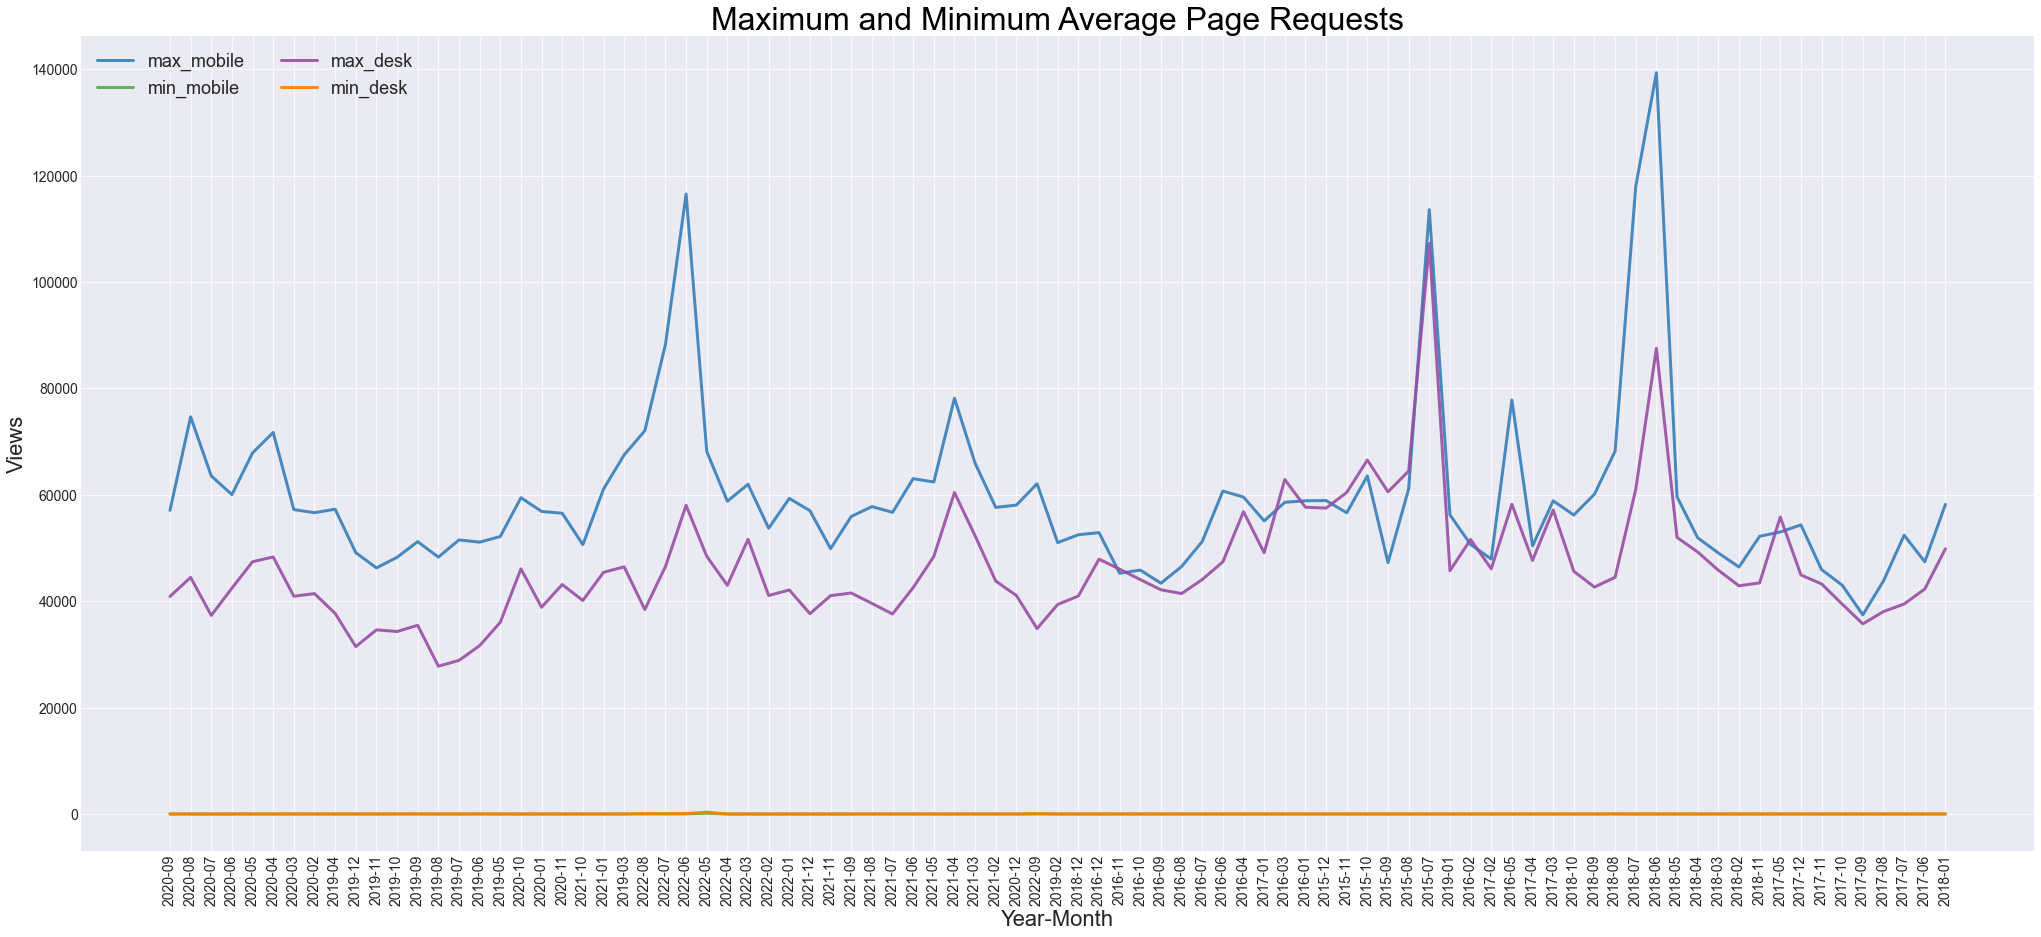

In [6]:
# Change the style of plot
plt.figure(figsize = (35,15))
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in max_min.drop('timestamp', axis=1):
    num+=1
    plt.plot(max_min['timestamp'], max_min[column], marker='', color=palette(num), linewidth=3, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2, fontsize=18)
 
# Add titles
plt.title("Maximum and Minimum Average Page Requests", loc='center', fontsize=32, fontweight=0, color='black')
plt.xlabel("Year-Month", fontsize=22)
plt.ylabel("Views", fontsize=22)
plt.xticks(rotation = 'vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('visualizations/max_min_avg.png')

## Creating peak page view timeseries

Start by finding the 10 mobile and desktop highest peak pages.

In [7]:
# First mobile
mobile_peak = mobile.groupby('article')['views'].max()
mobile_peak = mobile_peak.reset_index()
mobile_peak = mobile_peak.sort_values(by='views', ascending=False)
mobile_peak = mobile_peak['article'].head(10)
# Now desktop
desktop_peak = desktop.groupby('article')['views'].max()
desktop_peak = desktop_peak.reset_index()
desktop_peak = desktop_peak.sort_values(by='views', ascending=False)
desktop_peak = desktop_peak['article'].head(10)

Now to filter to the relevant articles and distinguish if the row is coming from mobile or desktop data by creating the traffic column.

In [9]:
mobile_pseries = mobile[mobile['article'].isin(mobile_peak)]
mobile_pseries['traffic'] = 'mobile'
desk_pseries = desktop[desktop['article'].isin(desktop_peak)]
desk_pseries['traffic'] = 'desktop'
pseries = pd.concat([mobile_pseries, desk_pseries])
pseries['name'] = pseries['article'] + ' ' + pseries['traffic']
pseries = pseries.drop(['project', 'article', 'granularity', 'agent', 'traffic'], axis = 1)
pseries = pseries.pivot(index="timestamp", columns="name", values="views")
pseries = pseries.reset_index()

C:\Users\Ross\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ross\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Now the visualization can be built and saved to the visualizations folder.

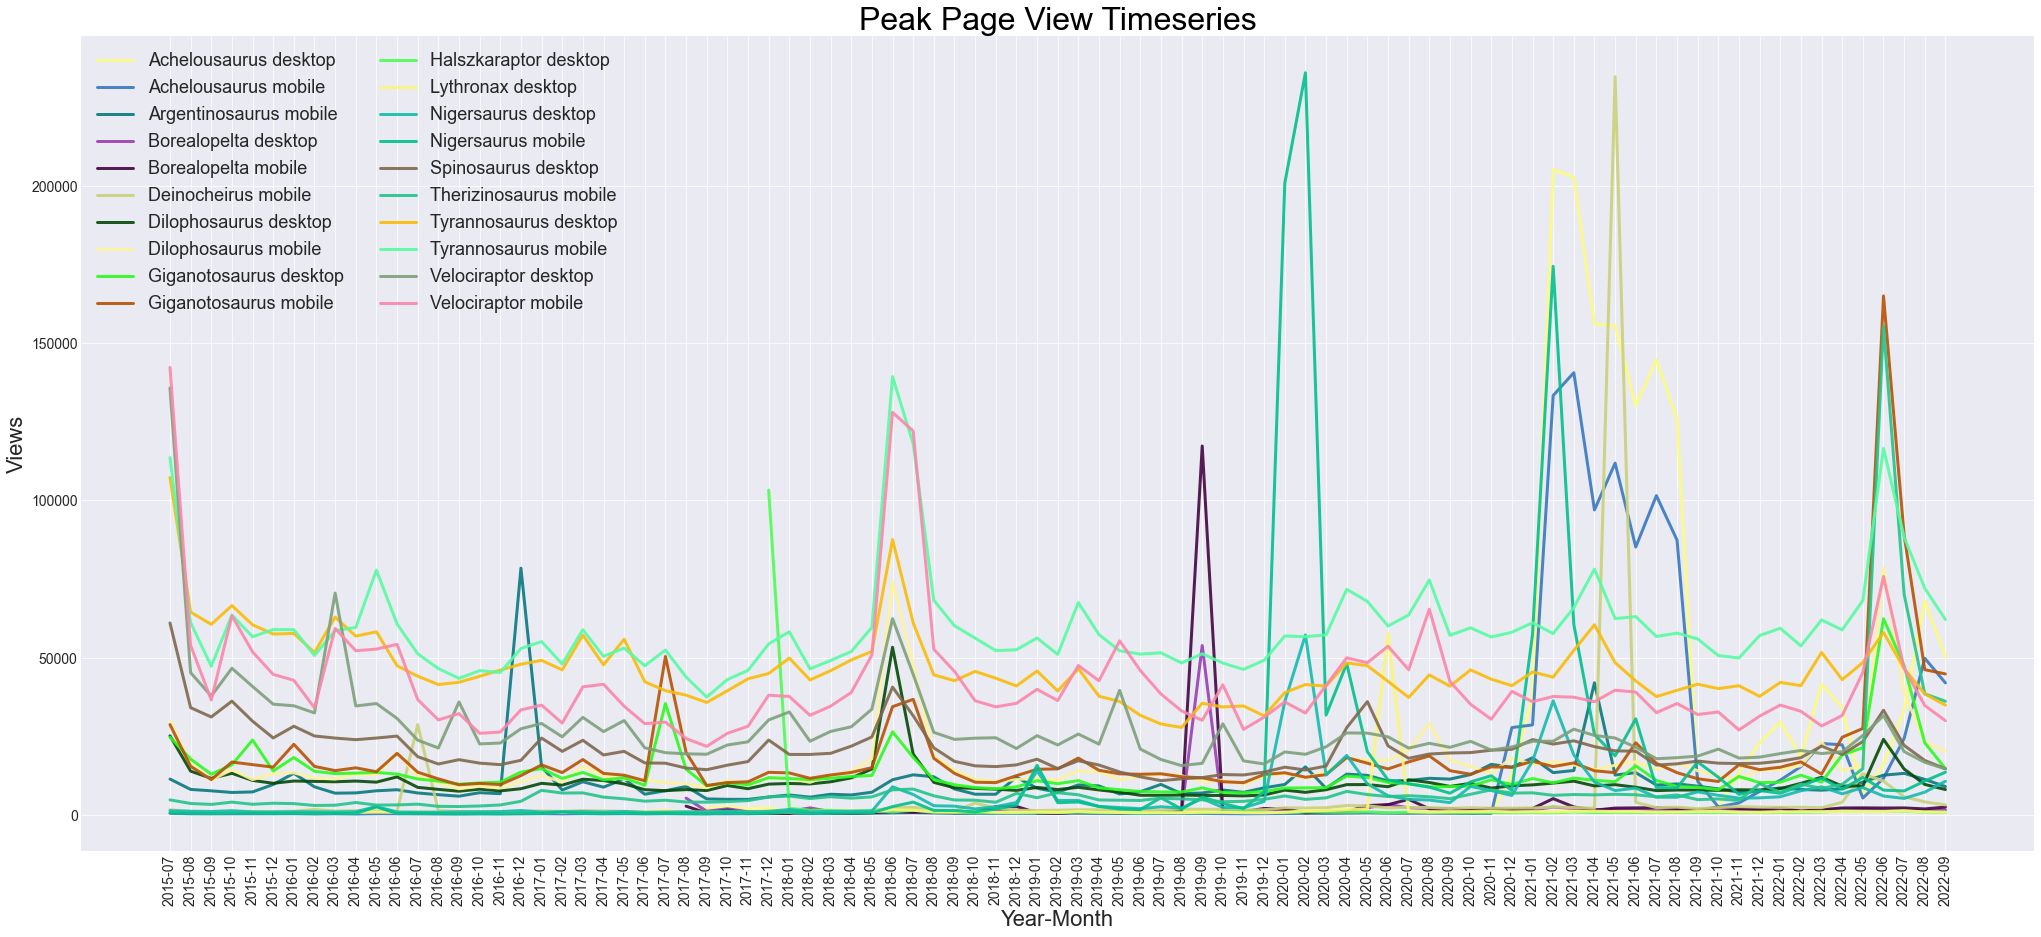

In [10]:
# Change the style of plot
plt.figure(figsize = (35,15))
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = list(mcd.XKCD_COLORS.values())[::10]
 
# Plot multiple lines
num=0
for column in pseries.drop('timestamp', axis=1):
    num+=1
    plt.plot(pseries['timestamp'], pseries[column], marker='', color=palette[num], linewidth=3, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2, fontsize=18)
 
# Add titles
plt.title("Peak Page View Timeseries", loc='center', fontsize=32, fontweight=0, color='black')
plt.xlabel("Year-Month", fontsize=22)
plt.ylabel("Views", fontsize=22)
plt.xticks(rotation = 'vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('visualizations/peak_page_view.png')

## Creating fewest months timeseries

First find the articles with the fewest months of data for both desktop and mobile.

In [11]:
# First get the mobile
mobile_few = mobile.groupby('article').count()
mobile_few = mobile_few.reset_index().sort_values(by='timestamp')
mobile_few = mobile_few['article'].head(10)
# Now the desktop
desk_few = desktop.groupby('article').count()
desk_few = desk_few.reset_index().sort_values(by='timestamp')
desk_few = desk_few['article'].head(10)

Now filter the data and create a traffic column again to distinguish if the article row is mobile or desktop traffic.

In [12]:
mobile_fseries = mobile[mobile['article'].isin(mobile_few)]
mobile_fseries['traffic'] = 'mobile'
desk_fseries = desktop[desktop['article'].isin(desk_few)]
desk_fseries['traffic'] = 'desktop'
fseries = pd.concat([mobile_fseries, desk_fseries])
fseries['name'] = fseries['article'] + ' ' + fseries['traffic']
fseries = fseries.drop(['project', 'article', 'granularity', 'agent', 'traffic'], axis = 1)
fseries = fseries.pivot(index="timestamp", columns="name", values="views")
fseries = fseries.reset_index()

C:\Users\Ross\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ross\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Now the visualization can be built and saved to the visualizations folder.

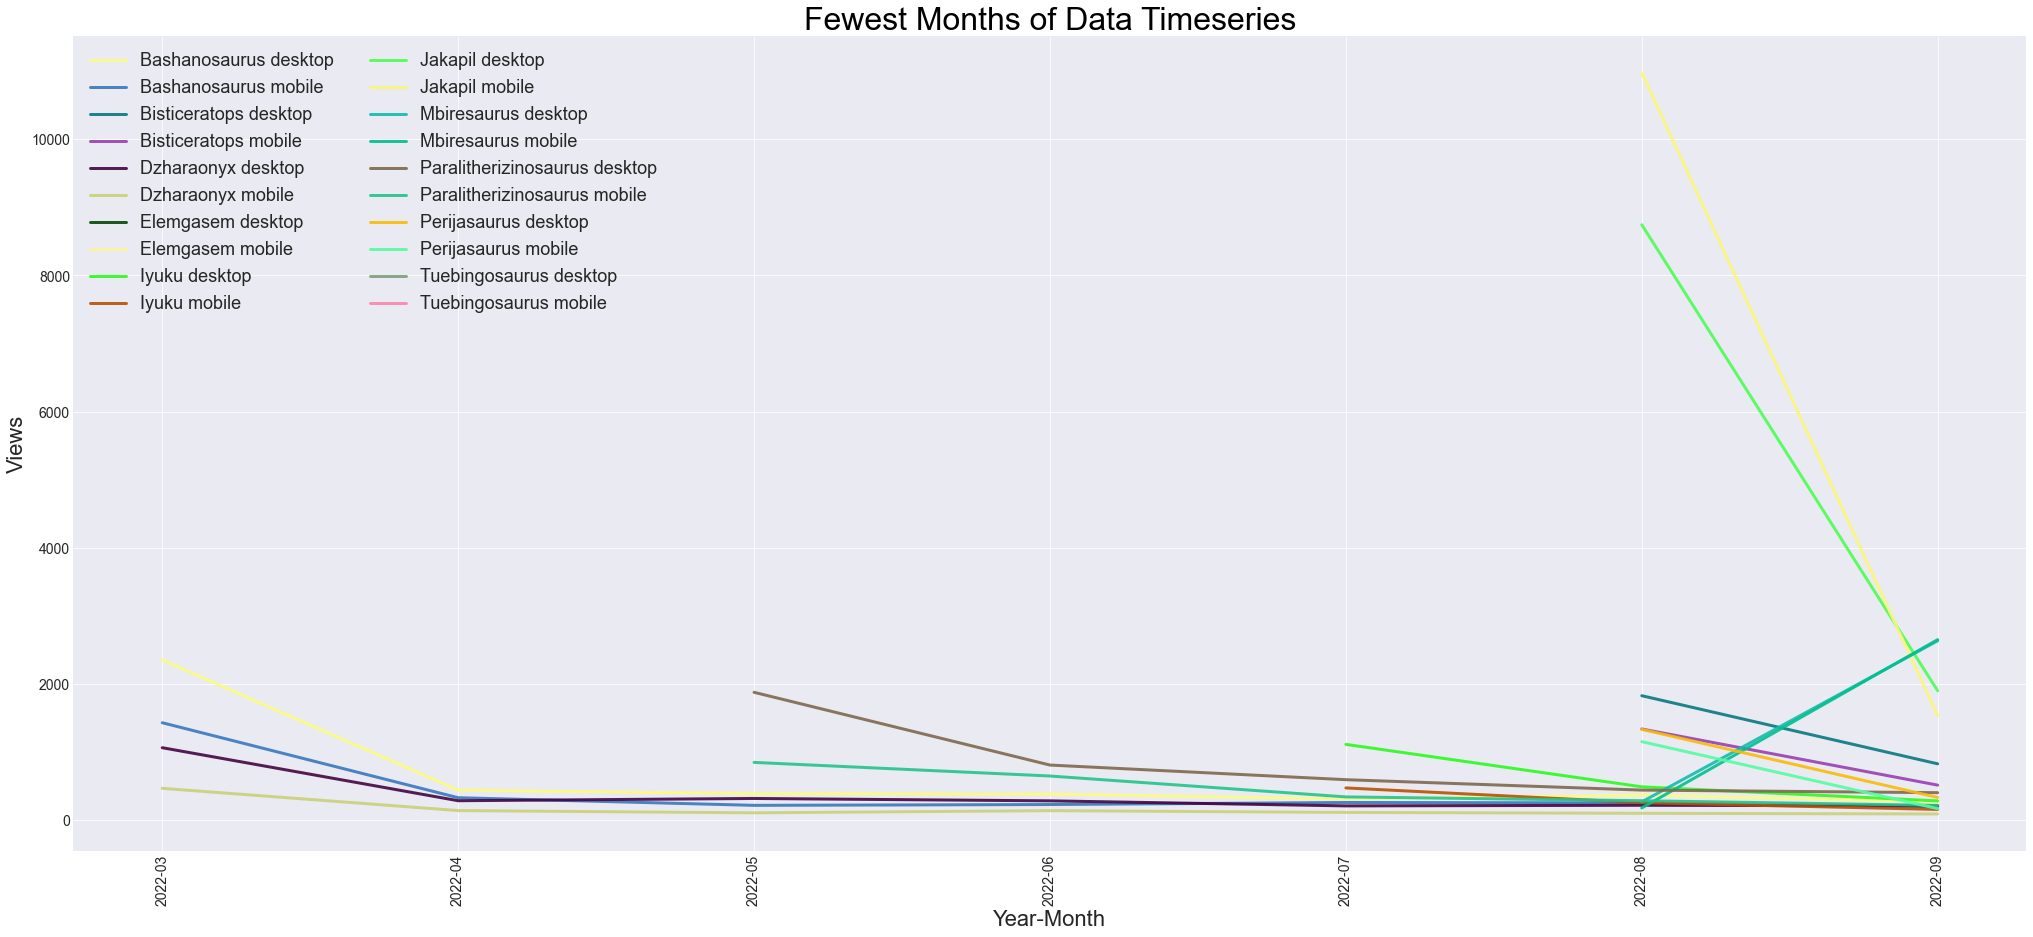

In [13]:
# Change the style of plot
plt.figure(figsize = (35,15))
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = list(mcd.XKCD_COLORS.values())[::10]
 
# Plot multiple lines
num=0
for column in fseries.drop('timestamp', axis=1):
    num+=1
    plt.plot(fseries['timestamp'], fseries[column], marker='', color=palette[num], linewidth=3, alpha=0.9, label=column)

# Add legend
plt.legend(loc=2, ncol=2, fontsize=18)
 
# Add titles
plt.title("Fewest Months of Data Timeseries", loc='center', fontsize=32, fontweight=0, color='black')
plt.xlabel("Year-Month", fontsize=22)
plt.ylabel("Views", fontsize=22)
plt.xticks(rotation = 'vertical', fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('visualizations/fewest_months.png')